# Income Prediction Challenge

Submitted By: Sarang Markandey

### Pipeline:
- Import labraries
- Load Data
- EDA(Exploratory Data Analysis)
-

<b> Updating Libraries </b>

In [1]:
!pip install --upgrade scikit-learn numpy pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('always')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


### Load Dataset

In [4]:
train = pd.read_csv('Train.csv')
train

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Householder,Householder,NaN,NaN,2,Joint both 65+,0,0,71,Native,95,US,US,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,0,700,No,52,32,Wholesale trade,42,Handlers equip cleaners etc,4,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both under 65,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


In [5]:
test = pd.read_csv('Test.csv')
test

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,0,600,No,46,29,Transportation,38,Transportation and material moving,2,Householder,Householder,NaN,NaN,2,Joint both under 65,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,NaN,0,0,NaN,52,5,Manufacturing-durable goods,37,Machine operators assmblrs & inspctrs,4,Householder,Householder,NaN,NaN,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,NaN,1,0,NaN,44,37,Business and repair services,4,Professional specialty,5,Householder,Householder,NaN,NaN,2,Joint both under 65,15024,0,500,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,NaN,0,0,NaN,8,0,Not in universe or children,0,NaN,6,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1933.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89781,ID_TZ299280,5,Male,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Father only present,NaN,0,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,938.83
89782,ID_TZ299281,81,Female,7th and 8th grade,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1985.66
89783,ID_TZ299282,65,Female,High school graduate,Federal government,NaN,Married-civilian spouse present,White,Other Spanish,Children or Armed Forces,NaN,0,0,NaN,52,46,Forestry and fisheries,31,Other service,6,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint one under 65 & one 65+,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,552.74
89784,ID_TZ299283,38,Female,High school graduate,Private,NaN,Married-A F spouse present,White,All other,Full-time schedules,NaN,2,0,NaN,43,33,Retail trade,19,Sales,3,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both under 65,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1917.71


### Exporatory Data Analysis

In [6]:
train['income_above_limit'].unique()

array(['Below limit', 'Above limit'], dtype=object)

In [7]:
train['income_above_limit'] = train['income_above_limit'].map({'Above limit':1, 'Below limit':0})
train['income_above_limit'].value_counts()

0    196501
1     12998
Name: income_above_limit, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [9]:
train.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record,income_above_limit
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324,0.062043
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557,0.241235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000,0.000000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000,0.000000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000,0.000000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000,1.000000


In [10]:
#checking percentage of null values in particular columns
round((train.isnull().sum()/train.shape[0])*100,2)


ID                                 0.00
age                                0.00
gender                             0.00
education                          0.00
class                             50.24
education_institute               93.65
marital_status                     0.00
race                               0.00
is_hispanic                        0.00
employment_commitment              0.00
unemployment_reason               96.89
employment_stat                    0.00
wage_per_hour                      0.00
is_labor_union                    90.42
working_week_per_year              0.00
industry_code                      0.00
industry_code_main                 0.00
occupation_code                    0.00
occupation_code_main              50.45
total_employed                     0.00
household_stat                     0.00
household_summary                  0.00
under_18_family                   72.39
veterans_admin_questionnaire      99.01
vet_benefit                        0.00


In [11]:
original_train = train.copy()
original_test = test.copy()

#savings columns name which have more than 80% null values in train data
nan_cols = []
for i in train.columns:
    if round((train[i].isnull().sum()/train.shape[0])*100,2) > 50:
        nan_cols.append(i)
nan_cols.append('ID')
nan_cols

['class',
 'education_institute',
 'unemployment_reason',
 'is_labor_union',
 'occupation_code_main',
 'under_18_family',
 'veterans_admin_questionnaire',
 'residence_1_year_ago',
 'old_residence_reg',
 'old_residence_state',
 'ID']

In [12]:
train_df = train.drop(nan_cols, axis=1)
train_df.shape

(209499, 32)

In [13]:
null_val_col = []
for i in train_df.columns:
    if round((train_df[i].isnull().sum()/train_df.shape[0])*100,2) > 0:
        null_val_col.append(i)
null_val_col

['migration_code_change_in_msa',
 'migration_prev_sunbelt',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg']

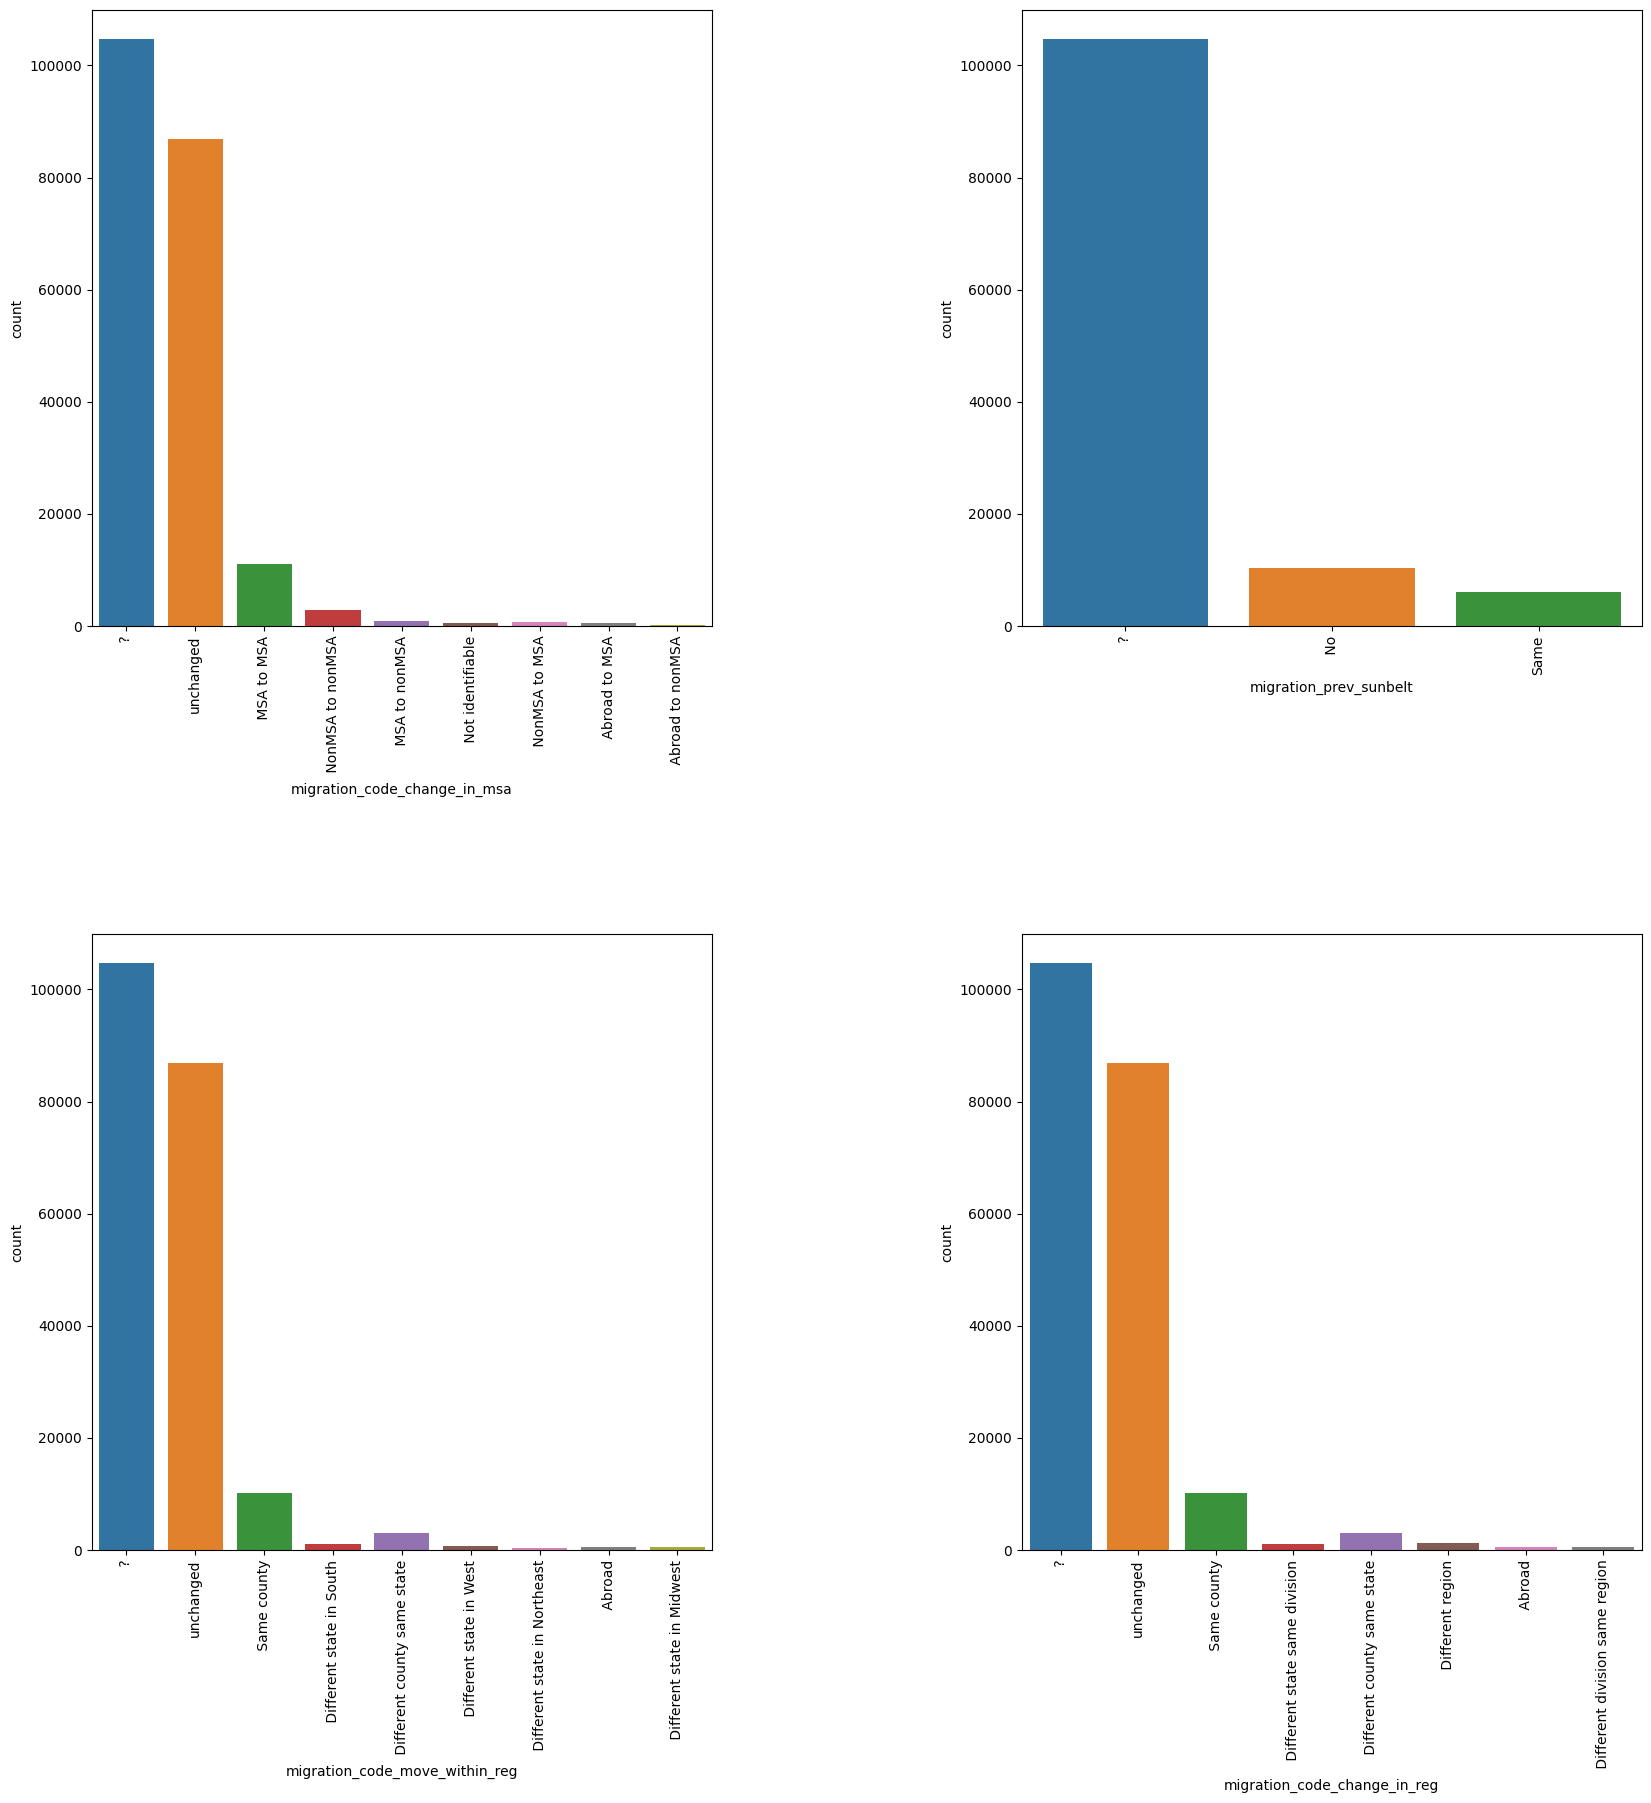

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for variable, subplot in zip(train_df[null_val_col], ax.flatten()):
    sns.countplot(x=variable,data=train_df[null_val_col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [15]:
# removing  'migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg'it has lot of unknown values which is not useful
train_df = train_df.drop(['migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg'], axis=1)

In [16]:
round((train_df.isnull().sum()/train.shape[0])*100,2)


age                        0.0
gender                     0.0
education                  0.0
marital_status             0.0
race                       0.0
is_hispanic                0.0
employment_commitment      0.0
employment_stat            0.0
wage_per_hour              0.0
working_week_per_year      0.0
industry_code              0.0
industry_code_main         0.0
occupation_code            0.0
total_employed             0.0
household_stat             0.0
household_summary          0.0
vet_benefit                0.0
tax_status                 0.0
gains                      0.0
losses                     0.0
stocks_status              0.0
citizenship                0.0
mig_year                   0.0
country_of_birth_own       0.0
country_of_birth_father    0.0
country_of_birth_mother    0.0
importance_of_record       0.0
income_above_limit         0.0
dtype: float64

In [17]:
train_df.shape

(209499, 28)

Dealing with Null values in test data

In [18]:
#checking percentage of null values in particular columns
round((test.isnull().sum()/test.shape[0])*100,2)

ID                                 0.00
age                                0.00
gender                             0.00
education                          0.00
class                             50.21
education_institute               93.75
marital_status                     0.00
race                               0.00
is_hispanic                        0.00
employment_commitment              0.00
unemployment_reason               97.02
employment_stat                    0.00
wage_per_hour                      0.00
is_labor_union                    90.57
working_week_per_year              0.00
industry_code                      0.00
industry_code_main                 0.00
occupation_code                    0.00
occupation_code_main              50.42
total_employed                     0.00
household_stat                     0.00
household_summary                  0.00
under_18_family                   72.36
veterans_admin_questionnaire      98.97
vet_benefit                        0.00


In [19]:
#savings columns name which have more than 80% null values in test data
nan_cols = []
for i in test.columns:
    if round((test[i].isnull().sum()/test.shape[0])*100,2) > 50:
        nan_cols.append(i)
nan_cols.append('ID')
nan_cols

['class',
 'education_institute',
 'unemployment_reason',
 'is_labor_union',
 'occupation_code_main',
 'under_18_family',
 'veterans_admin_questionnaire',
 'residence_1_year_ago',
 'old_residence_reg',
 'old_residence_state',
 'ID']

In [20]:
test_df = test.drop(nan_cols, axis=1)
test_df.shape

(89786, 31)

In [21]:
# removing  'migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg'it has lot of unknown values which is not useful
test_df = test_df.drop(['migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg'], axis=1)
test_df.isnull().sum()

age                        0
gender                     0
education                  0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
importance_of_record       0
dtype: int64

In [22]:
test_df.shape

(89786, 27)

In [23]:
train_df

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,1779.74,0
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,2366.75,0
2,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,US,US,US,1693.42,0
3,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,1380.27,0
4,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,1580.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,Female,7th and 8th grade,Never married,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,US,US,US,2170.60,0
209495,78,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,0,Householder,Householder,2,Joint both 65+,0,0,71,Native,95,US,US,Canada,1029.57,0
209496,8,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,US,US,791.61,0
209497,26,Female,Some college but no degree,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,52,32,Wholesale trade,42,4,Spouse of householder,Spouse of householder,2,Joint both under 65,0,0,0,Native,94,US,US,US,3530.26,0


In [24]:
numerical_list = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_list = train_df.select_dtypes(exclude=np.number).columns.tolist()
print(numerical_list)
print(categorical_list)

['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record', 'income_above_limit']
['gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother']


In [25]:
len(numerical_list)

14

Handling Numerical features 

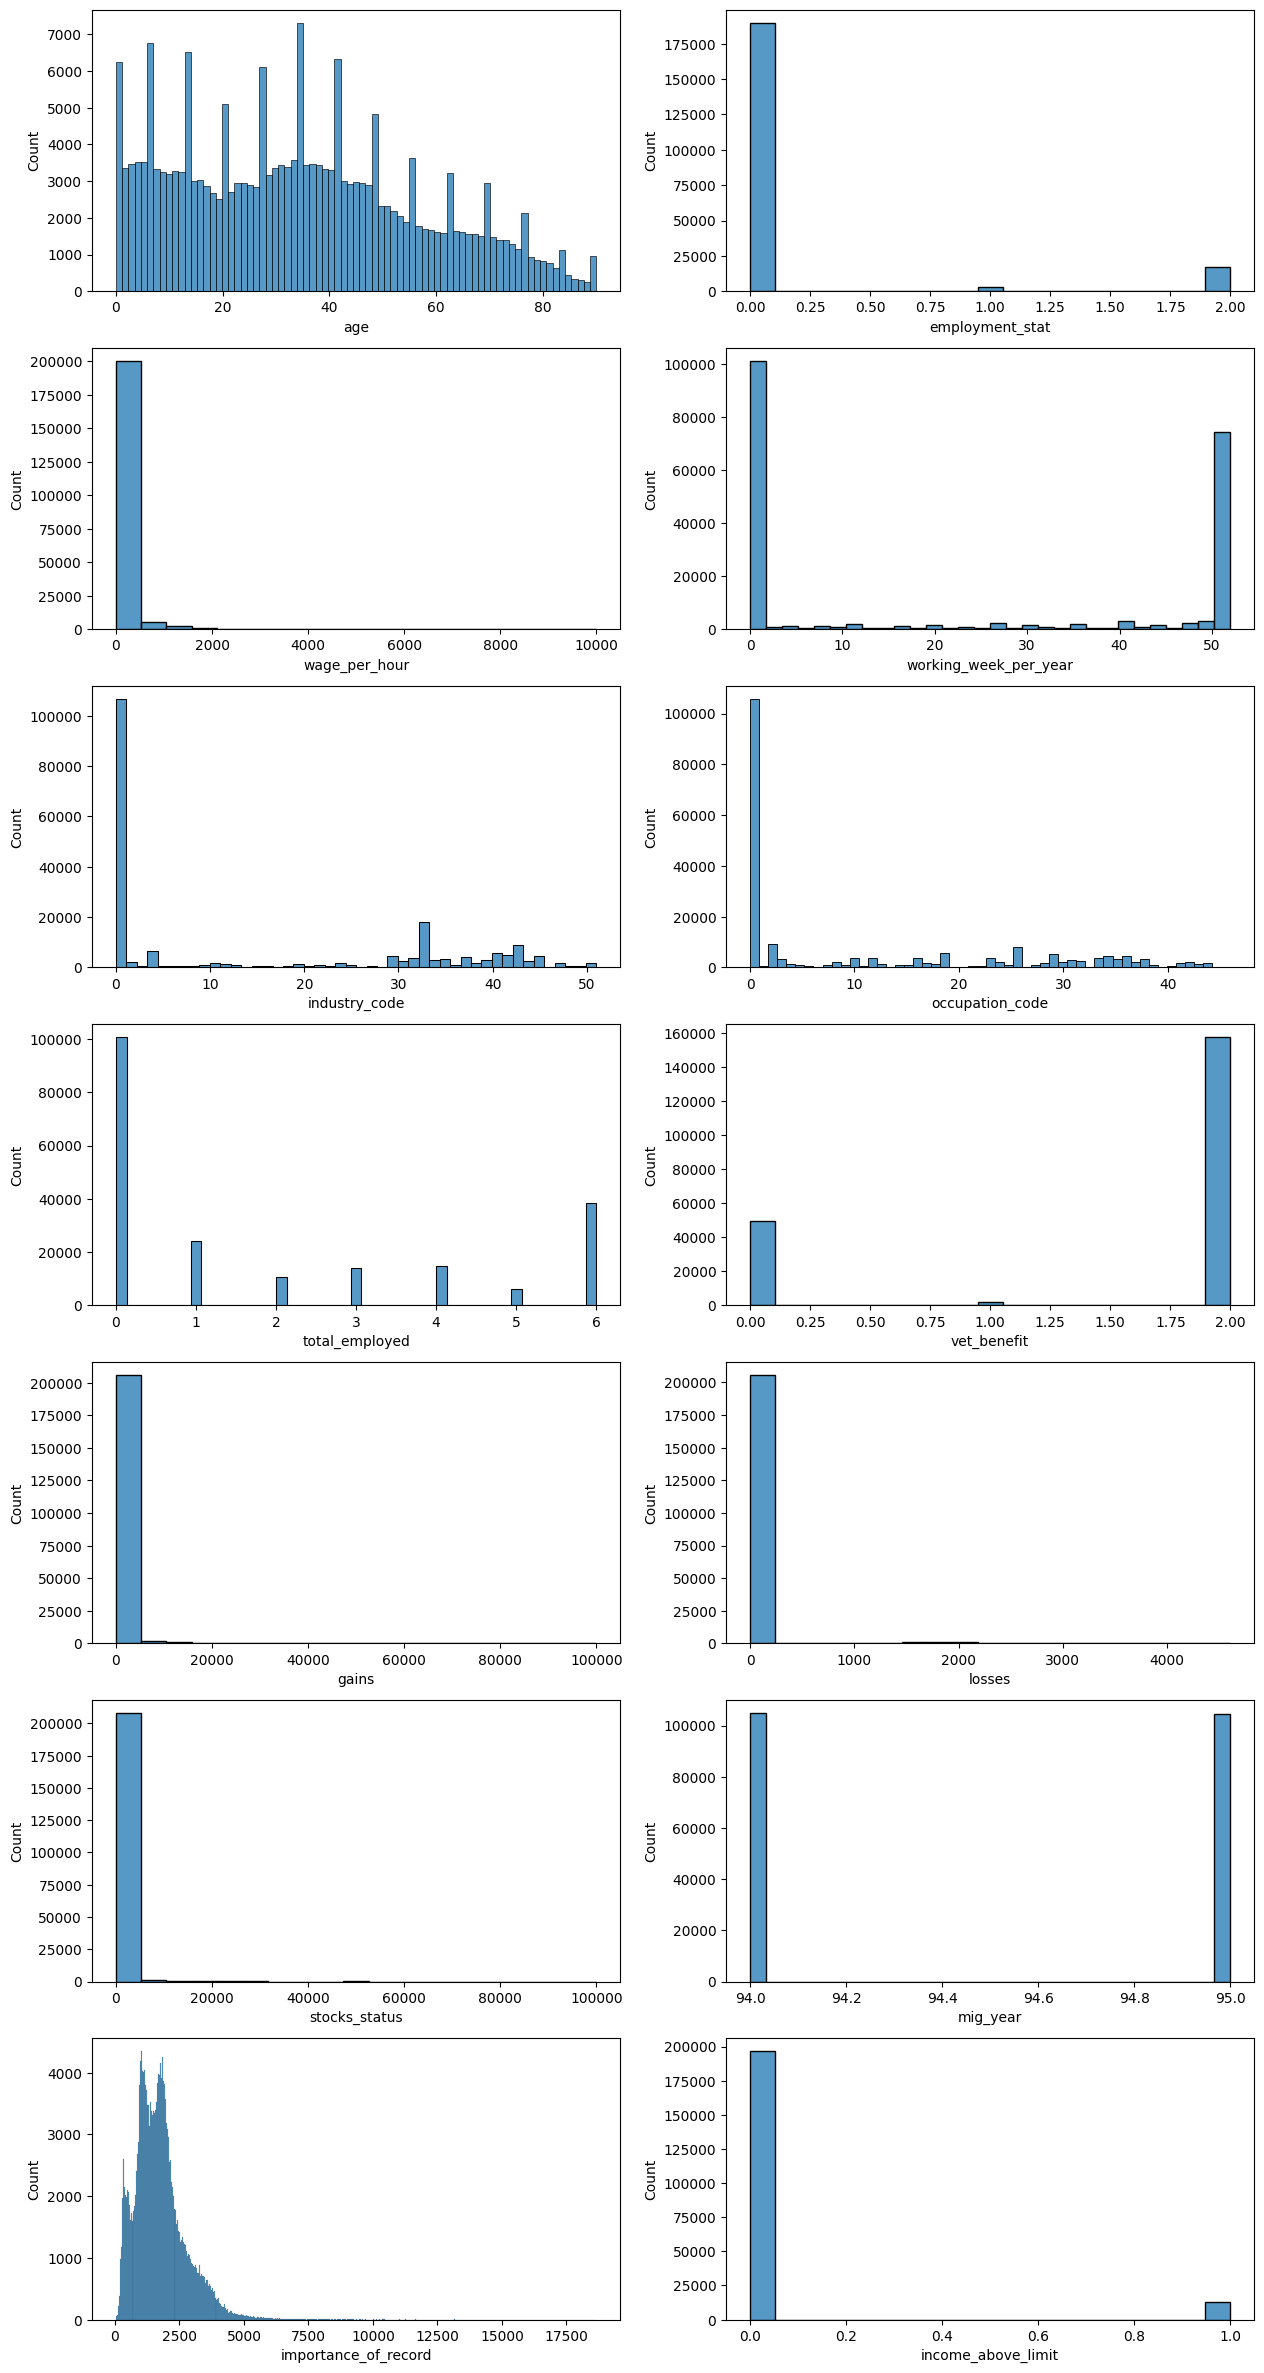

In [26]:
fig, ax = plt.subplots(7,2, figsize=(15,30))
for variable, subplot in zip(train_df[numerical_list], ax.flatten()):
    sns.histplot(x=variable,data=train_df[numerical_list], ax=subplot)

In [27]:
len(train_df[train_df['wage_per_hour'] == 0])

197643

In [28]:
len(train_df[train_df['gains'] == 0])  #96

201669

In [29]:
len(train_df[train_df['losses'] == 0]) #98%

205437

In [30]:
len(train_df[train_df['stocks_status'] == 0]) 

187467

In [31]:
len(train_df[train_df['mig_year'] == 94.8])

0

In [32]:
#removing stocks_status, loss and gain column from train and test because it has 89% 96% and 98% values are zero, it will overfit our data
train_df = train_df.drop(['gains', 'losses','stocks_status'], axis=1)
test_df = test_df.drop(['gains', 'losses', 'stocks_status'], axis=1)

In [33]:
print(train_df.shape)
print(test_df.shape)

(209499, 25)
(89786, 24)


Handling Categorical Features

In [34]:
len(categorical_list)

14

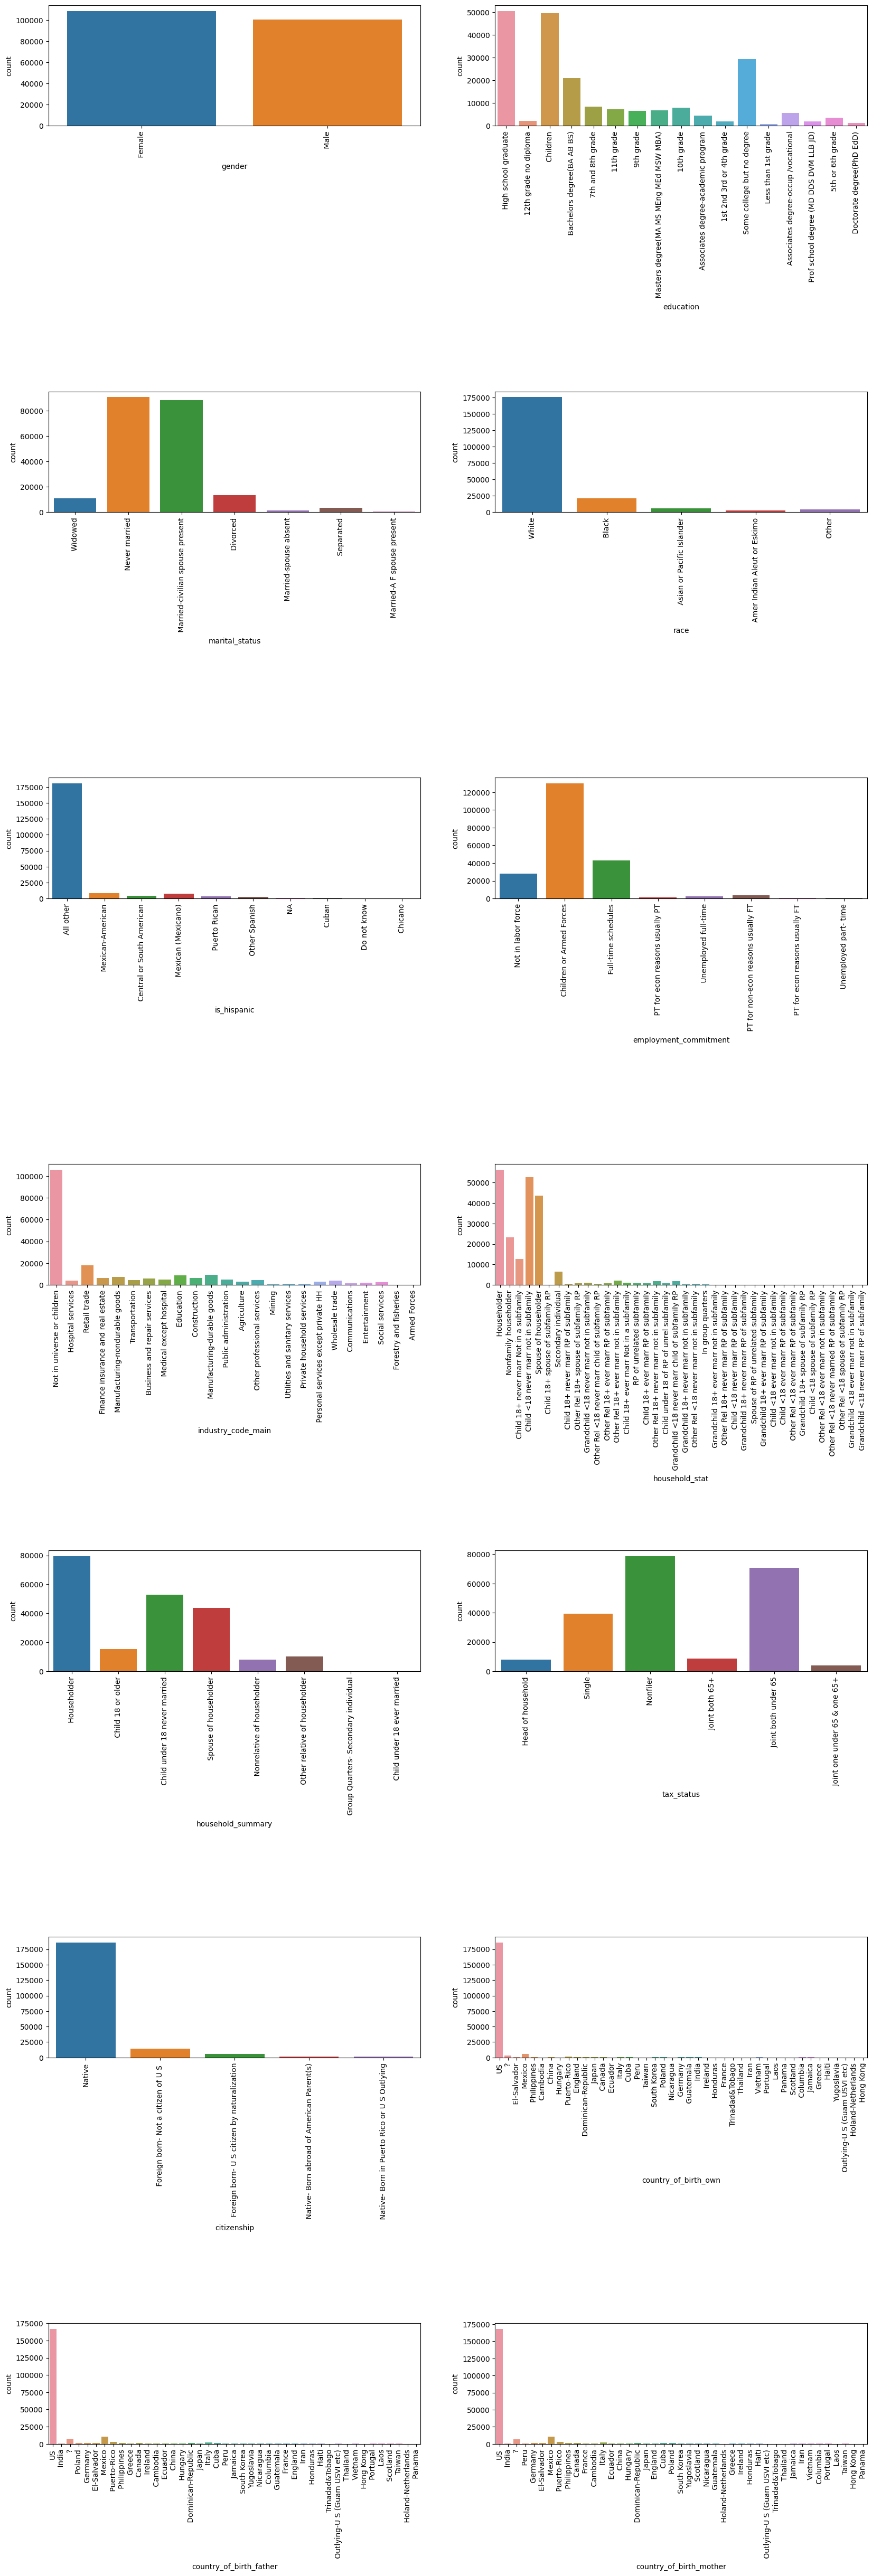

In [35]:
fig, ax = plt.subplots(7, 2, figsize=(20, 60))
fig.subplots_adjust(hspace=2.2)
for variable, subplot in zip(train_df[categorical_list], ax.flatten()):
    sns.countplot(x=variable,data=train_df[categorical_list], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [36]:
categorical_list

['gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'industry_code_main',
 'household_stat',
 'household_summary',
 'tax_status',
 'citizenship',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother']

In [37]:
# removing  'country_of_birth_own','country_of_birth_father', 'country_of_birth_mother', 'is_hispanic', 'household_stat', 'industry_code_main', 'race', 'citizenship'
train_df = train_df.drop(['country_of_birth_own','country_of_birth_father', 'country_of_birth_mother', 'is_hispanic', 'household_stat', 'industry_code_main', 'race', 'citizenship'], axis=1)
test_df = test_df.drop(['country_of_birth_own','country_of_birth_father', 'country_of_birth_mother', 'is_hispanic', 'household_stat', 'industry_code_main', 'race', 'citizenship'], axis=1)
print(train_df.shape)
print(test_df.shape)

(209499, 17)
(89786, 16)


In [38]:
train_df

,age,gender,education,marital_status,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,household_summary,vet_benefit,tax_status,mig_year,importance_of_record,income_above_limit
0,79,Female,High school graduate,Widowed,Not in labor force,0,0,52,0,0,2,Householder,2,Head of household,95,1779.74,0
1,65,Female,High school graduate,Widowed,Children or Armed Forces,0,0,0,0,0,0,Householder,2,Single,94,2366.75,0
2,21,Male,12th grade no diploma,Never married,Children or Armed Forces,0,500,15,41,26,4,Child 18 or older,2,Single,94,1693.42,0
3,2,Female,Children,Never married,Children or Armed Forces,0,0,0,0,0,0,Child under 18 never married,0,Nonfiler,94,1380.27,0
4,70,Male,High school graduate,Married-civilian spouse present,Not in labor force,0,0,0,0,0,0,Spouse of householder,2,Joint both 65+,95,1580.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,Female,7th and 8th grade,Never married,Not in labor force,0,0,0,0,0,0,Child under 18 never married,2,Nonfiler,95,2170.60,0
209495,78,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,Not in labor force,0,0,0,0,0,0,Householder,2,Joint both 65+,95,1029.57,0
209496,8,Female,Children,Never married,Children or Armed Forces,0,0,0,0,0,0,Child under 18 never married,0,Nonfiler,95,791.61,0
209497,26,Female,Some college but no degree,Married-civilian spouse present,Children or Armed Forces,0,700,52,32,42,4,Spouse of householder,2,Joint both under 65,94,3530.26,0


In [39]:
train_df['gender'].unique()

array([' Female', ' Male'], dtype=object)

In [40]:
train_df['mig_year'].unique()

array([95, 94])

In [41]:
train_df['gender'] = train_df['gender'].map({' Male':0, ' Female':1})
train_df['mig_year'] = train_df['mig_year'].map({95:0, 94:1})
test_df['gender'] = test_df['gender'].map({' Male':0, ' Female':1})
test_df['mig_year'] = test_df['mig_year'].map({95:0, 94:1})

In [42]:
train_df['gender']

0         1
1         1
2         0
3         1
4         0
         ..
209494    1
209495    0
209496    1
209497    1
209498    0
Name: gender, Length: 209499, dtype: int64

In [43]:
new_numerical_list = train_df.select_dtypes(include=np.number).columns.to_list()
new_categorical_list = train_df.select_dtypes(exclude=np.number).columns.to_list()
print(new_numerical_list)
print()
print(new_categorical_list)

['age', 'gender', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'mig_year', 'importance_of_record', 'income_above_limit']

['education', 'marital_status', 'employment_commitment', 'household_summary', 'tax_status']


Encoding categorical features and scaling numerical features

In [44]:
from sklearn.preprocessing import StandardScaler

dummies = pd.get_dummies(train_df[new_categorical_list], drop_first=True)
scaling_list = ['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'importance_of_record']
scaler = StandardScaler()
scaled_df = scaler.fit_transform(train_df[scaling_list])
scaled_df = pd.DataFrame(scaled_df, columns= scaling_list)
scaled_df

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,importance_of_record
0,1.994078,-0.318165,-0.200297,1.182116,-0.849459,-0.782926,0.018575,0.569014,0.039025
1,1.366464,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,0.628655
2,-0.606039,-0.318165,1.606344,-0.334408,1.422058,1.015038,0.864188,0.569014,-0.047680
3,-1.457802,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,-1.781576,-0.362228
4,1.590612,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,-0.160813
...,...,...,...,...,...,...,...,...,...
209494,-0.830187,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,0.431629
209495,1.949249,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,-0.714493
209496,-1.188824,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,-1.781576,-0.953515
209497,-0.381891,-0.318165,2.329001,1.182116,0.923433,2.121477,0.864188,0.569014,1.797357


In [45]:
train_df['gender']

0         1
1         1
2         0
3         1
4         0
         ..
209494    1
209495    0
209496    1
209497    1
209498    0
Name: gender, Length: 209499, dtype: int64

In [46]:
final_df = pd.concat([scaled_df, dummies, train_df[['gender', 'mig_year', 'income_above_limit']] ], axis=1)
final_df

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,importance_of_record,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,marital_status_ Married-A F spouse present,marital_status_ Married-civilian spouse present,marital_status_ Married-spouse absent,marital_status_ Never married,marital_status_ Separated,marital_status_ Widowed,employment_commitment_ Full-time schedules,employment_commitment_ Not in labor force,employment_commitment_ PT for econ reasons usually FT,employment_commitment_ PT for econ reasons usually PT,employment_commitment_ PT for non-econ reasons usually FT,employment_commitment_ Unemployed full-time,employment_commitment_ Unemployed part- time,household_summary_ Child under 18 ever married,household_summary_ Child under 18 never married,household_summary_ Group Quarters- Secondary individual,household_summary_ Householder,household_summary_ Nonrelative of householder,household_summary_ Other relative of householder,household_summary_ Spouse of householder,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single,gender,mig_year,income_above_limit
0,1.994078,-0.318165,-0.200297,1.182116,-0.849459,-0.782926,0.018575,0.569014,0.039025,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.366464,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,0.628655,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
2,-0.606039,-0.318165,1.606344,-0.334408,1.422058,1.015038,0.864188,0.569014,-0.047680,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,-1.457802,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,-1.781576,-0.362228,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
4,1.590612,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,-0.160813,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,-0.830187,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,0.431629,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
209495,1.949249,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,0.569014,-0.714493,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
209496,-1.188824,-0.318165,-0.200297,-0.949215,-0.849459,-0.782926,-0.827038,-1.781576,-0.953515,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
209497,-0.381891,-0.318165,2.329001,1.182116,0.923433,2.121477,0.864188,0.569014,1.797357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0


In [47]:
X = final_df.drop('income_above_limit', axis=1)
y = final_df['income_above_limit']

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=200)

In [65]:
print(X_train.shape)
print(X_test.shape)

(167599, 52)
(41900, 52)


In [66]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dt=DecisionTreeClassifier()
rf=RandomForestClassifier() 
adb=AdaBoostClassifier()     
gdboost=GradientBoostingClassifier() 
xgboost=XGBClassifier() 

In [67]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)

/home/drsherlock/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [68]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.9468075585176523
knn classification score 0.9548744324250145
dt classification score 0.9999940333772874
rf classification score 0.9999463003955871
adb classification score 0.9469388242173282
gdboost classification score 0.9493553064159094
xgboost classification score 0.9562407890261875


In [69]:
lr_ypred = lr.predict(X_test)
knn_ypred = knn.predict(X_test)
dt_ypred = dt.predict(X_test)
rf_ypred = rf.predict(X_test)
adb_ypred = adb.predict(X_test)
gdboost_ypred = gdboost.predict(X_test)
xgboost_ypred = xgboost.predict(X_test)

In [70]:
lr_report = classification_report(y_test,lr_ypred)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_ypred)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_ypred)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_ypred)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_ypred)
print(" adb classification_report" ,'\n',adb_report)


gdboost_report = classification_report(y_test,gdboost_ypred)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_ypred)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     39300
           1       0.67      0.31      0.42      2600

    accuracy                           0.95     41900
   macro avg       0.82      0.65      0.70     41900
weighted avg       0.94      0.95      0.94     41900

 knn classification_report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     39300
           1       0.55      0.32      0.41      2600

    accuracy                           0.94     41900
   macro avg       0.75      0.65      0.69     41900
weighted avg       0.93      0.94      0.93     41900

 dt classification_report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     39300
           1       0.38      0.41      0.39      2600

    accuracy                           0.92     41900
   macro avg       0.67      0.68      0.68

In [71]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr_ypred))
print(roc_auc_score(y_test,knn_ypred))
print(roc_auc_score(y_test,dt_ypred))
print(roc_auc_score(y_test,rf_ypred))
print(roc_auc_score(y_test,adb_ypred))
print(roc_auc_score(y_test,gdboost_ypred))
print(roc_auc_score(y_test,xgboost_ypred))

0.6483837345860246
0.6528107261695048
0.6823111176355451
0.6595801526717557
0.6535408103347035
0.6665002935995302
0.6796706791935799


/home/drsherlock/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/drsherlock/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/drsherlock/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is d

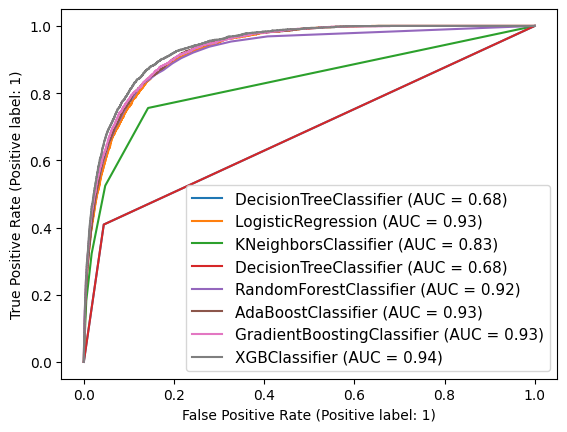

In [72]:
#lets find roc curve to check best fitted model
# here ax_ for axis with confustion matrics
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier are giving best scores.

In [73]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y= y
)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : [3,4],
    'subsample' : [0.5,0.8],
    'learning_rate': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
    'min_child_weight' : [1,2],
    'random_state' : [4,5], 
    'sample_weight': sample_weights
}

gridsearch = GridSearchCV(xgboost, param_grid= param_grid, cv=5)
gridsearch.fit(X_train,y_train)